In [2]:
import torch
import torchvision.models as models


vgg16 = models.vgg16(weights=models.VGG16_Weights.DEFAULT)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
print(vgg16)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

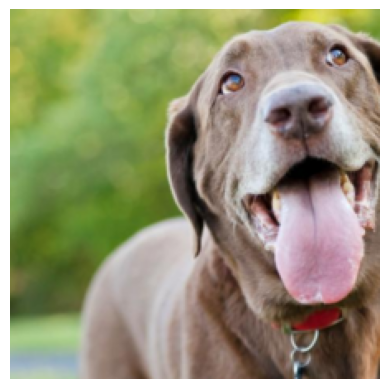

Predicted class index: 178


In [6]:
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image
 
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

image = Image.open("dog.png")

input_tensor = preprocess(image)

mean = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
std  = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)
display_tensor = input_tensor * std + mean

# Convert CHW -> HWC
display_tensor = display_tensor.permute(1, 2, 0)

plt.imshow(display_tensor)
plt.axis("off")
plt.show()

input_batch = input_tensor.unsqueeze(0)
input_batch = input_batch.to(device)

vgg16.eval()
 
with torch.no_grad():
    output = vgg16(input_batch)


_, predicted_idx = torch.max(output, 1)
print("Predicted class index:", predicted_idx.item())

In [17]:
def display_tensor(input_tensor, mean=None, standard_deviation=None):
    final_tensor = input_tensor
    if mean and standard_deviation:
        mean = torch.tensor(mean).view(3, 1, 1)
        std  = torch.tensor(standard_deviation).view(3, 1, 1)
        final_tensor = input_tensor * std + mean

        # Convert CHW -> HWC
    final_tensor = final_tensor.permute(1, 2, 0)

    plt.imshow(final_tensor)
    plt.axis("off")
    plt.show()

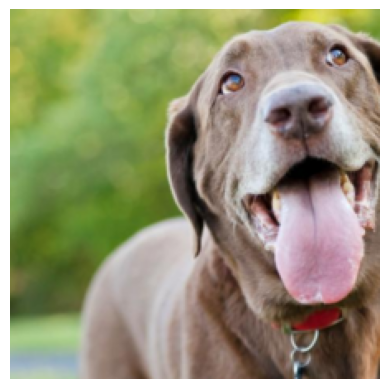

Predicted class index: 178


In [22]:
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image

mean = [0.485, 0.456, 0.406]
standard_deviation = [0.229, 0.224, 0.225]
 
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=standard_deviation)
])

image = Image.open("dog.png")

input_tensor = preprocess(image)
# display_tensor(input_tensor)
display_tensor(input_tensor, mean, standard_deviation)

input_batch = input_tensor.unsqueeze(0)
input_batch = input_batch.to(device)

vgg16.eval()
 
# with torch.no_grad():
output = vgg16(input_batch)


_, predicted_idx = torch.max(output, 1)
print("Predicted class index:", predicted_idx.item())